In [1]:
# pip install requests

In [2]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import seaborn as sns
# import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFE
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, RidgeCV, LassoCV, Ridge, Lasso

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA

from tensorflow.keras           import Sequential
from tensorflow.keras           import optimizers
from tensorflow.keras.layers    import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard



In [3]:
pwd

'C:\\Users\\Anas\\UpstreamTech'

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 38C8-6FD5

 Directory of C:\Users\Anas\UpstreamTech

09/22/2020  09:11 AM    <DIR>          .
09/22/2020  09:11 AM    <DIR>          ..
09/21/2020  07:49 AM    <DIR>          .ipynb_checkpoints
09/16/2020  03:11 PM            25,276 1763.csv
09/16/2020  03:11 PM             3,358 1763.csv.gz
09/16/2020  03:29 PM       145,839,404 1987.csv.gz
09/16/2020  03:54 PM        98,161,286 2020.csv.gz
09/22/2020  07:39 AM               661 app.py
09/16/2020  02:38 PM         3,023,202 cleaned_banner_df.csv
09/16/2020  03:21 PM           939,687 cleaned_banner_df_copied.csv
09/21/2020  08:36 PM           171,072 lstm_model_1.h5
09/19/2020  10:14 AM    <DIR>          LSTM_tutorial
09/22/2020  07:11 AM               254 model.py
09/15/2020  05:44 AM    <DIR>          t81_558_deep_learning-master
09/22/2020  07:00 AM               102 test_VScode.py
09/21/2020  07:51 AM               555 Untitled.ipynb
09/22/2020  09:11 AM            31,528 Upst

Getting the data:

In [5]:
df_raw = pd.read_csv('cleaned_banner_df_copied.csv') #, skiprows=852)#error_bad_lines=False)#skiprows=2)

Looking at the data

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49177 entries, 0 to 49176
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             12295 non-null  object 
 1   PRCP             12293 non-null  float64
 2   SNWD             7156 non-null   float64
 3   TAVG             11768 non-null  float64
 4   TMAX             11769 non-null  float64
 5   TMIN             11760 non-null  float64
 6   TOBS             12220 non-null  float64
 7   WESD             12291 non-null  float64
 8   DAY_OF_YEAR      12295 non-null  float64
 9   STREAMFLOW</td>  12295 non-null  object 
dtypes: float64(8), object(2)
memory usage: 3.8+ MB


In [7]:
df_raw.head()

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR,STREAMFLOW</td>
0,1/1/1987,0.9,NaN,NaN,NaN,NaN,16.0,6.8,1.0,272</td>
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/2/1987,0.1,NaN,NaN,NaN,NaN,19.0,6.8,2.0,290</td>


**Data Cleaning**

In [8]:
df = df_raw[df_raw['DATE'].isnull() == False]
df = df.reset_index(drop=True)
# edit the STREAMFLOW column
df = df.rename(columns={"STREAMFLOW</td>":"STREAMFLOW"})
df['STREAMFLOW'] = df['STREAMFLOW'].map(lambda x: x.rstrip('</td>'))
df['STREAMFLOW'] = pd.to_numeric(df['STREAMFLOW'])
df

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR,STREAMFLOW
0,1/1/1987,0.9,NaN,NaN,NaN,NaN,16.0,6.8,1.0,272
1,1/2/1987,0.1,NaN,NaN,NaN,NaN,19.0,6.8,2.0,290
2,1/3/1987,0.4,NaN,NaN,NaN,NaN,19.0,7.4,3.0,296
3,1/4/1987,0.0,NaN,NaN,NaN,NaN,10.0,7.4,4.0,291
4,1/5/1987,0.0,NaN,NaN,NaN,NaN,6.0,7.4,5.0,282
...,...,...,...,...,...,...,...,...,...,...
12290,8/26/2020,0.2,0.0,59.0,77.0,44.0,49.0,0.0,239.0,413
12291,8/27/2020,0.0,0.0,55.0,72.0,44.0,44.0,0.0,240.0,417
12292,8/28/2020,0.0,0.0,56.0,75.0,42.0,44.0,0.0,241.0,408
12293,8/29/2020,0.0,0.0,56.0,76.0,38.0,41.0,0.0,242.0,398


Looking at the data again

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         12295 non-null  object 
 1   PRCP         12293 non-null  float64
 2   SNWD         7156 non-null   float64
 3   TAVG         11768 non-null  float64
 4   TMAX         11769 non-null  float64
 5   TMIN         11760 non-null  float64
 6   TOBS         12220 non-null  float64
 7   WESD         12291 non-null  float64
 8   DAY_OF_YEAR  12295 non-null  float64
 9   STREAMFLOW   12295 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 960.7+ KB


In [10]:
df.describe(include='all')

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR,STREAMFLOW
count,12295,12293.000000,7156.000000,11768.000000,11769.000000,11760.000000,12220.000000,12291.000000,12295.000000,12295.000000
unique,12295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8/1/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.111437,25.225964,36.887152,52.136375,24.521684,29.215303,8.472362,181.906547,799.920455
std,NaN,0.243582,28.996324,15.046982,17.804351,13.736933,13.219119,10.094612,105.204373,902.579963
min,NaN,0.000000,0.000000,-22.000000,-5.000000,-35.000000,-32.000000,0.000000,1.000000,130.000000
25%,NaN,0.000000,0.000000,26.000000,37.000000,15.000000,21.000000,0.000000,91.000000,304.000000
50%,NaN,0.000000,10.000000,36.000000,50.000000,27.000000,30.000000,3.500000,181.000000,412.000000
75%,NaN,0.100000,49.000000,49.000000,67.000000,34.000000,38.250000,15.600000,273.000000,878.000000


In [11]:
df.isnull().sum()

DATE              0
PRCP              2
SNWD           5139
TAVG            527
TMAX            526
TMIN            535
TOBS             75
WESD              4
DAY_OF_YEAR       0
STREAMFLOW        0
dtype: int64

In [12]:
(df.isnull().sum()/df.shape[0])*100

DATE            0.000000
PRCP            0.016267
SNWD           41.797479
TAVG            4.286295
TMAX            4.278162
TMIN            4.351362
TOBS            0.610004
WESD            0.032534
DAY_OF_YEAR     0.000000
STREAMFLOW      0.000000
dtype: float64

In [13]:
df.duplicated().sum()

0

**First thing first; splitting the data!**

In [14]:
print(df.shape)
temp_train = round(df.shape[0]*0.7)
print('temp_train:',temp_train)
temp_valid = round(df.shape[0]*0.15)
print('temp_valid:',temp_valid)
temp_test = round(df.shape[0]*0.15)
print('temp_test :',temp_test)
print('summation =',temp_train+temp_valid+temp_test)

(12295, 10)
temp_train: 8606
temp_valid: 1844
temp_test : 1844
summation = 12294


In [15]:
print(df.shape[0]/365,'years')
temp_train = round(df.shape[0]*0.6)/365
print('temp_train:',temp_train,'years')
temp_valid = round(df.shape[0]*0.2)/365
print('temp_valid:',temp_valid,'years')
temp_test = round(df.shape[0]*0.2)/365
print('temp_test :',temp_test,'years')
print('summation =',temp_train+temp_valid+temp_test,'years')

33.68493150684932 years
temp_train: 20.21095890410959 years
temp_valid: 6.736986301369863 years
temp_test : 6.736986301369863 years
summation = 33.68493150684932 years


In [16]:
# user inputs
targetName = 'STREAMFLOW'
test_size  = 0.2 #0.2
valid_size = 0.2 #0.2  # 0.25
valid_size_from_train = valid_size/(1-test_size)  # 0.2/0.8 = 0.25 --> which is 0.2 of the whole data set (0.25 x 0.8 = 0.2)

X = df.drop(labels=targetName, axis=1)
y = df[targetName]

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=test_size, random_state=1)

X_train, X_valid, y_train, y_valid = \
train_test_split(X_train, y_train, test_size=valid_size_from_train, random_state=1)

y_train = pd.DataFrame(data=y_train, columns=[targetName])
y_valid = pd.DataFrame(data=y_valid, columns=[targetName])
y_test  = pd.DataFrame(data=y_test, columns=[targetName])

# reset indicies
X_train = X_train.reset_index(drop=True)#, inplace=True)
X_valid = X_valid.reset_index(drop=True)#, inplace=True)
X_test  = X_test.reset_index(drop=True)#, inplace=True)

y_train = y_train.reset_index(drop=True)#, inplace=True)
y_valid = y_valid.reset_index(drop=True)#, inplace=True)
y_test  = y_test.reset_index(drop=True)#, inplace=True)

print()
print('df.shape   :', df.shape)
print()
print('X_train.shape:', X_train.shape, 'of type', type(X_train))
print('X_valid.shape:', X_valid.shape, 'of type', type(X_valid))
print('X_test.shape :', X_test.shape, 'of type', type(X_test))
print()
print('y_train.shape:', y_train.shape, 'of type', type(y_train))
print('y_valid.shape:', y_valid.shape, 'of type', type(y_valid))
print('y_test.shape :', y_test.shape, 'of type', type(y_test))
print()





df.shape   : (12295, 10)

X_train.shape: (7377, 9) of type <class 'pandas.core.frame.DataFrame'>
X_valid.shape: (2459, 9) of type <class 'pandas.core.frame.DataFrame'>
X_test.shape : (2459, 9) of type <class 'pandas.core.frame.DataFrame'>

y_train.shape: (7377, 1) of type <class 'pandas.core.frame.DataFrame'>
y_valid.shape: (2459, 1) of type <class 'pandas.core.frame.DataFrame'>
y_test.shape : (2459, 1) of type <class 'pandas.core.frame.DataFrame'>



**Data Preprocessing**

Find which features are categoricals and which ones are numerical

In [17]:
# find fetures types
catFeatNames = []
numFeatNames = []
for i in range(X_train.shape[1]):
    if X_train[X_train.columns[i]].dtypes == 'object':
        catFeatNames.append(X_train.columns[i])
    else:
        numFeatNames.append(X_train.columns[i])

# create a seperate dataframe for each type of features and for target
X_train_cat = X_train[catFeatNames] #pd.DataFrame(data=X_train[catFeatNames])
X_valid_cat = X_valid[catFeatNames]
X_test_cat  = X_test[catFeatNames]

X_train_num = X_train[numFeatNames] #pd.DataFrame(data=X_train[numFeatNames])
X_valid_num = X_valid[numFeatNames]
X_test_num  = X_test[numFeatNames]

print('df sahpe:',df.shape)
print()
print(X_train_cat.shape[1],'categorical features found:')
print(X_train_cat.columns.values)
print()
print(X_train_num.shape[1],'numerical features found:')
print(X_train_num.columns.values)
print()
print('Target name:' , y_train.columns.values)
print('Target shape:', y_train.shape)
print('Target dtype:', y_train.dtypes)
print()
print('double check:')
print(X_train_cat.shape)
print(X_train_num.shape)
print(y_train.shape, '+')
print('-------------')
print(df.shape)

df sahpe: (12295, 10)

1 categorical features found:
['DATE']

8 numerical features found:
['PRCP' 'SNWD' 'TAVG' 'TMAX' 'TMIN' 'TOBS' 'WESD' 'DAY_OF_YEAR']

Target name: ['STREAMFLOW']
Target shape: (7377, 1)
Target dtype: STREAMFLOW    int64
dtype: object

double check:
(7377, 1)
(7377, 8)
(7377, 1) +
-------------
(12295, 10)


*Data Imputation*

In [18]:
df.isnull().sum()

DATE              0
PRCP              2
SNWD           5139
TAVG            527
TMAX            526
TMIN            535
TOBS             75
WESD              4
DAY_OF_YEAR       0
STREAMFLOW        0
dtype: int64

In [19]:
X_train_num.isnull().sum()

PRCP              0
SNWD           3071
TAVG            323
TMAX            322
TMIN            329
TOBS             50
WESD              4
DAY_OF_YEAR       0
dtype: int64

In [20]:
# Imputation for numerical features
imputerX = SimpleImputer(missing_values=np.nan,
                        strategy='mean',
                        fill_value=None,
                        verbose=1,
                        copy=True,
                        add_indicator=False).fit(X_train_num)
imputerY = SimpleImputer(missing_values=np.nan,
                        strategy='mean',
                        fill_value=None,
                        verbose=1,
                        copy=True,
                        add_indicator=False).fit(y_train)

X_train_num = imputerX.transform(X_train_num)
X_valid_num = imputerX.transform(X_valid_num)
X_test_num  = imputerX.transform(X_test_num)
print(np.isnan(X_train_num).sum())
print(np.isnan(X_valid_num).sum())
print(np.isnan(X_test_num).sum())
y_train = imputerY.transform(y_train)
y_valid = imputerY.transform(y_valid)
y_test  = imputerY.transform(y_test)
print(np.isnan(y_train).sum())
print(np.isnan(y_valid).sum())
print(np.isnan(y_test).sum())

0
0
0
0
0
0


*Data Scaling*

In [21]:
# scalerX = StandardScaler().fit(X_train_num)
# scalerY = StandardScaler().fit(y_train)

scalerX = MinMaxScaler(feature_range=(0, 1)).fit(X_train_num)
scalerY = MinMaxScaler(feature_range=(0, 1)).fit(y_train)

X_train_num_scaled = pd.DataFrame(data=scalerX.transform(X_train_num), columns=numFeatNames)
X_valid_num_scaled = pd.DataFrame(data=scalerX.transform(X_valid_num), columns=numFeatNames)
X_test_num_scaled  = pd.DataFrame(data=scalerX.transform(X_test_num),  columns=numFeatNames)

y_train_scaled = pd.DataFrame(data=scalerY.transform(y_train), columns=[targetName])
y_valid_scaled = pd.DataFrame(data=scalerY.transform(y_valid), columns=[targetName])
y_test_scaled  = pd.DataFrame(data=scalerY.transform(y_test) , columns=[targetName])

**Let's work on categorical features now**

In [22]:
# Get number of uniques in each categorical feature. This is important to decide
# whether a categorical feature should be one-hot-encoded (dummied up) or just
# simply dropped. 
unique_cat = []
for i in X_train_cat.columns:
    unique_cat.append(len(X_train_cat[i].unique()))

unique_cat_info = pd.DataFrame(data=X_train_cat.columns.values.reshape(-1,1), columns=['Cat Feature Name'])
unique_cat_info.insert(loc=unique_cat_info.shape[1], column='Unique Values', value=unique_cat)
percentages = np.round((np.array(unique_cat)/X_train_cat.shape[0])*100, 3)
unique_cat_info.insert(loc=unique_cat_info.shape[1], column='compared to the data size (%)', value=percentages)
unique_cat_info = unique_cat_info.sort_values(by='Unique Values')
unique_cat_info


,Cat Feature Name,Unique Values,compared to the data size (%)
0,DATE,7377,100.0


In [23]:
# drop features with only 1 unique valus
print('X_train_cat.shape (before dropping)',X_train_cat.shape)
X_train_cat_dropUnique = X_train_cat
for i in range(X_train_cat.shape[1]):
    uniqueValue = len(X_train_cat[X_train_cat.columns[i]].unique())
    if uniqueValue == 1:
        print("Feature","'",X_train_cat.columns[i],"'","has",uniqueValue ,"unique value(s). Dropping...")
        X_train_cat_dropUnique = X_train_cat_dropUnique.drop(labels=X_train_cat.columns[i], axis=1)

print('X_train_cat.shape (after dropping)',X_train_cat_dropUnique.shape)


X_train_cat.shape (before dropping) (7377, 1)
X_train_cat.shape (after dropping) (7377, 1)


In [24]:
# look at the rest of categorical features and their values counts
for i in range(X_train_cat.shape[1]):
    print(X_train_cat[X_train_cat.columns[i]].value_counts())
    print('-------------------')

8/1/2004      1
6/15/1995     1
4/11/2020     1
4/21/2015     1
3/20/1992     1
             ..
12/8/2008     1
12/10/1996    1
6/2/2009      1
3/10/2011     1
7/28/2007     1
Name: DATE, Length: 7377, dtype: int64
-------------------


In [25]:
# # drop more categorical features (>= than 22 unique values)
# print('X_train_cat_dropUnique.shape (before dropping)',X_train_cat_dropUnique.shape)

# for i in range(X_train_cat.shape[1]):
#   uniqueValue = len(X_train_cat[X_train_cat.columns[i]].unique())
#   if uniqueValue >= 22: #120:
#     print("Feature","'",X_train_cat.columns[i],"'","has",uniqueValue ,"unique value(s). Dropping...")
#     X_train_cat_dropUnique = X_train_cat_dropUnique.drop(labels=X_train_cat.columns[i], axis=1)

# print('X_train_cat.shape (after dropping)',X_train_cat_dropUnique.shape)


In [26]:
# look more at the remaining categorical features
print(len(X_train_cat_dropUnique.columns))
print(X_train_cat_dropUnique.columns)

1
Index(['DATE'], dtype='object')


In [27]:
X_train_cat_dropUnique

,DATE
0,10/17/2017
1,7/27/1989
2,6/7/2009
3,4/25/2016
4,9/2/2003
...,...
7372,3/16/2009
7373,10/15/2006
7374,8/15/2006
7375,3/11/1988


In [28]:
# one-hot-encode (or dummy up) categorical features
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train_cat_dropUnique)

X_train_cat_enc = enc.transform(X_train_cat[X_train_cat_dropUnique.columns]).toarray() 
X_train_cat_enc = pd.DataFrame(data=X_train_cat_enc,
                               columns=enc.get_feature_names(X_train_cat_dropUnique.columns))

X_valid_cat_enc = enc.transform(X_valid_cat[X_train_cat_dropUnique.columns]).toarray()
X_valid_cat_enc = pd.DataFrame(data=X_valid_cat_enc,
                               columns=enc.get_feature_names(X_train_cat_dropUnique.columns))

X_test_cat_enc  = enc.transform(X_test_cat[X_train_cat_dropUnique.columns]).toarray()
X_test_cat_enc = pd.DataFrame(data=X_test_cat_enc,
                               columns=enc.get_feature_names(X_train_cat_dropUnique.columns))

print()
print('number of categorical features before one-hot-encoding:',X_train_cat_dropUnique.shape)
print('number of categorical features after one-hot-encoding :',X_train_cat_enc.shape)
print()
print('X_train_cat_enc.shape:',X_train_cat_enc.shape)
print('X_valid_cat_enc.shape:',X_valid_cat_enc.shape)
print('X_test_cat_enc.shape :',X_test_cat_enc.shape)
print()
X_train_cat_enc


number of categorical features before one-hot-encoding: (7377, 1)
number of categorical features after one-hot-encoding : (7377, 7377)

X_train_cat_enc.shape: (7377, 7377)
X_valid_cat_enc.shape: (2459, 7377)
X_test_cat_enc.shape : (2459, 7377)



,DATE_1/1/1987,DATE_1/1/1989,DATE_1/1/1991,DATE_1/1/1992,DATE_1/1/1993,DATE_1/1/1994,DATE_1/1/1995,DATE_1/1/1996,DATE_1/1/1998,DATE_1/1/1999,...,DATE_9/9/2006,DATE_9/9/2007,DATE_9/9/2008,DATE_9/9/2009,DATE_9/9/2010,DATE_9/9/2011,DATE_9/9/2012,DATE_9/9/2013,DATE_9/9/2017,DATE_9/9/2018
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
IGNORE_CATEGORICAL = 1

if IGNORE_CATEGORICAL == 1:
    X_train_cat = pd.DataFrame(data=[])
X_train_cat.shape

(0, 0)

**Combine categorical and numerical features into a one dataframe for each dataset**

In [30]:
# if we have categorical and numerical features
if ((X_train_cat.shape[1] > 0) and (X_train_num.shape[1] > 0)): 
    print('Catergorical and numerical features present')
    df_train = pd.concat([X_train_cat_enc, X_train_num_scaled, y_train_scaled], 
                         axis=1, 
                         names=[X_train_cat_enc.columns, X_train_num_scaled.columns, y_train_scaled.columns], 
                         ignore_index=False)
    df_valid = pd.concat([X_valid_cat_enc, X_valid_num_scaled, y_valid_scaled], 
                         axis=1, 
                         names=[X_valid_cat_enc.columns, X_valid_num_scaled.columns, y_valid_scaled.columns], 
                         ignore_index=False)
    df_test  = pd.concat([X_test_cat_enc,  X_test_num_scaled, y_test_scaled], 
                          axis=1, 
                          names=[X_test_cat_enc.columns, X_test_num_scaled.columns, y_test_scaled.columns],   
                          ignore_index=False)
# if there are only numerical features
elif ((X_train_cat.shape[1] == 0) and (X_train_num.shape[1] > 0)):
    print('Only numerical features present')
    df_train = pd.concat([X_train_num_scaled, y_train_scaled], 
                          axis=1, 
                          names=[X_train_num_scaled.columns, y_train_scaled.columns], 
                          ignore_index=False)
    df_valid = pd.concat([X_valid_num_scaled, y_valid_scaled], 
                          axis=1, 
                          names=[X_valid_num_scaled.columns, y_valid_scaled.columns], 
                          ignore_index=False)
    df_test  = pd.concat([X_test_num_scaled, y_test_scaled], 
                          axis=1, 
                          names=[X_test_num_scaled.columns, y_test_scaled.columns],   
                          ignore_index=False)
# if there are only categorical features
elif ((X_train_cat.shape[1] > 0) and (X_train_num.shape[1] == 0)):
    print('Only categorical features present')
    df_train = pd.concat([X_train_cat_enc, y_train_scaled], 
                          axis=1, 
                          names=[X_train_cat_enc.columns, y_train_scaled.columns], 
                          ignore_index=False)
    df_valid = pd.concat([X_valid_cat_enc, y_valid_scaled], 
                          axis=1, 
                          names=[X_valid_cat_enc.columns, y_valid_scaled.columns], 
                          ignore_index=False)
    df_test  = pd.concat([X_test_cat_enc,  y_test_scaled], 
                          axis=1, 
                          names=[X_test_cat_enc.columns, y_test_scaled.columns],   
                          ignore_index=False)

print()
print('df_train.shape:', df_train.shape)
print('df_valid.shape:', df_valid.shape)
print('df_test.shape :', df_test.shape)
print()

Only numerical features present

df_train.shape: (7377, 9)
df_valid.shape: (2459, 9)
df_test.shape : (2459, 9)



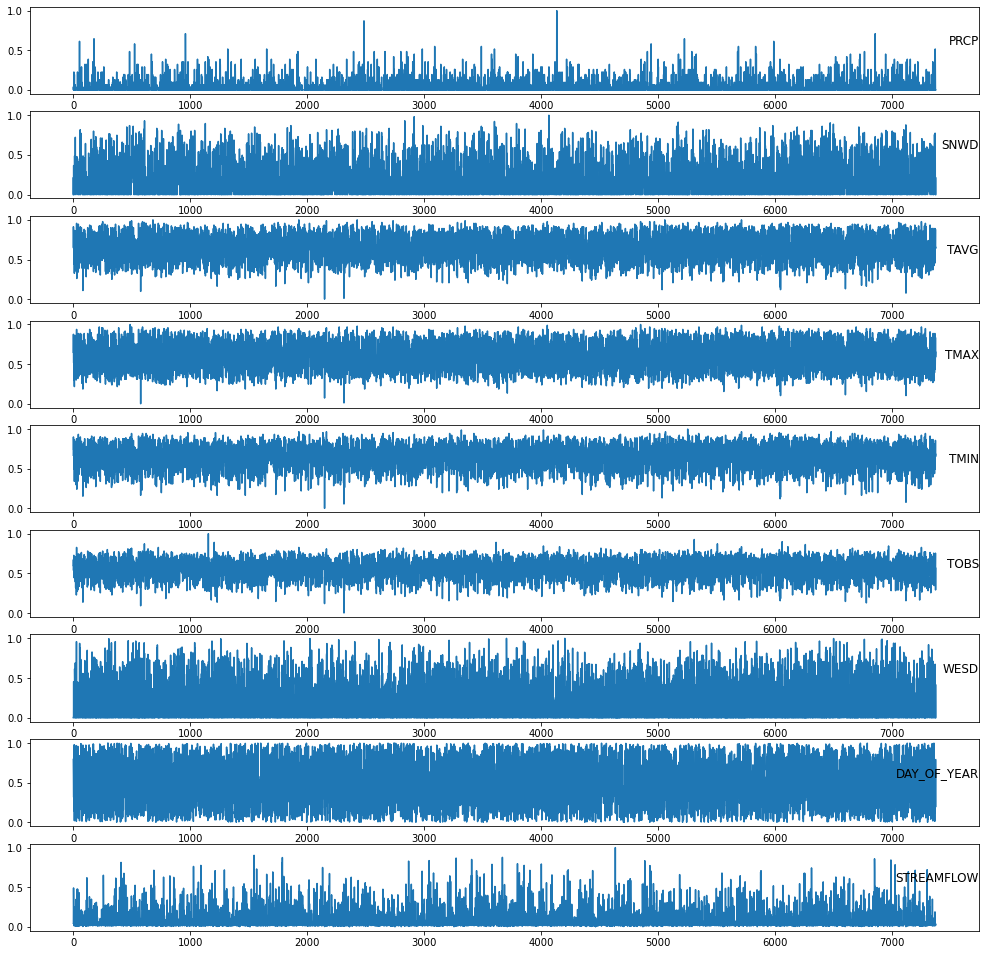

In [31]:
values = df_train.values
# specify columns to plot
groups = range(df_train.shape[1])
i = 1
# plot each column
plt.figure(figsize=(17,17))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df_train.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [32]:
# Specify sequence length
seq_len = 1 # 5 days
# temp_df_train = df_train.drop(targetName, axis=1)
# temp_df_valid = df_valid.drop(targetName, axis=1)
# temp_df_test  = df_test.drop(targetName, axis=1)
# Create X_train and y_train 
X_train = []
y_train = []
for i in range(seq_len, df_train.shape[0]):
    X_train.append(df_train.values[i-seq_len:i, :])
    y_train.append(df_train[targetName].values[i]) 
# Convert to Numpy array
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1,1)
# Create X_valid and y_valid 
X_valid = []
y_valid = []
for i in range(seq_len, df_valid.shape[0]):
    X_valid.append(df_valid.values[i-seq_len:i, :])
    y_valid.append(df_valid[targetName].values[i])
# Convert to Numpy array
X_valid = np.array(X_valid)
y_valid = np.array(y_valid).reshape(-1,1) 
# Create X_test and y_test
X_test = []
y_test = []
for i in range(seq_len, df_test.shape[0]):
    X_test.append(df_test.values[i-seq_len:i, :])
    y_test.append(df_test[targetName].values[i]) 
# Convert to Numpy array
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1,1) 
# Look at each set size
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_valid.shape = ',X_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('X_test.shape  = ', X_test.shape)
print('y_test.shape  = ',y_test.shape)
print('df_train.shape:',df_train.shape)
print('df.shape      :',df.shape)

X_train.shape =  (7376, 1, 9)
y_train.shape =  (7376, 1)
X_valid.shape =  (2458, 1, 9)
y_valid.shape =  (2458, 1)
X_test.shape  =  (2458, 1, 9)
y_test.shape  =  (2458, 1)
df_train.shape: (7377, 9)
df.shape      : (12295, 10)


In [56]:
type(X_test)

numpy.ndarray

In [62]:
#pd.DataFrame(X_test)#.to_json('data_test.json')

In [34]:
X_train.shape

(7376, 1, 9)

In [58]:
# json_str = json.dumps(X_train.tolist())

In [35]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(10, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(Dense(5))
model.add(Dense(1))#, activation='relu'))
# model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.001))
model.compile(loss='mae', optimizer=optimizers.Adam(learning_rate=0.001))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                12000     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 12,051
Trainable params: 12,051
Non-trainable params: 0
_________________________________________________________________


Train on 7376 samples, validate on 2458 samples
Epoch 1/100
7376/7376 - 6s - loss: 0.0712 - val_loss: 0.0650
Epoch 2/100
7376/7376 - 0s - loss: 0.0678 - val_loss: 0.0645
Epoch 3/100
7376/7376 - 0s - loss: 0.0675 - val_loss: 0.0639
Epoch 4/100
7376/7376 - 0s - loss: 0.0673 - val_loss: 0.0638
Epoch 5/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0637
Epoch 6/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0637
Epoch 7/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0636
Epoch 8/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0636
Epoch 9/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0636
Epoch 10/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0636
Epoch 11/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0636
Epoch 12/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0636
Epoch 13/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0636
Epoch 14/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0636
Epoch 15/100
7376/7376 - 0s - loss: 0.0672 - val_loss: 0.0636
Epoch 16/100
7376/7376 - 0s - l

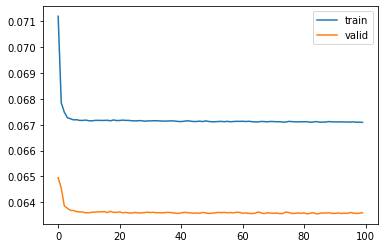

In [36]:
# fit network
history = model.fit(X_train, y_train, epochs=100, batch_size=365, validation_data=(X_valid, y_valid), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show() #365

In [37]:
# X_train.shape

In [38]:
# y_pred_train = model.predict(X_train)
# y_pred_train.shape
# # target_pred_train = y_pred_train[:,,:]

In [39]:
# df_train.shape

In [40]:
# X_train[:,:,-1].shape

In [41]:
# temp = X_train[:,:,-1].reshape()
# temp.shape

In [42]:
# y_pred_train = model.predict(X_train)[:,0]
# y_pred_valid = model.predict(X_valid)[:,0]
# y_pred_test  = model.predict(X_test)[:,0]

# print(y_pred_train.shape)
# print(y_train.shape)
# print(y_pred_valid.shape)
# print(y_valid.shape)
# print(y_pred_test.shape)
# print(y_test.shape)

In [43]:
def predictAndEval(model, X_train, X_valid, X_test, y_train, y_valid, y_test, scalerY):
    y_pred_train = model.predict(X_train)#[:,0]
    y_pred_valid = model.predict(X_valid)#[:,0]
    y_pred_test  = model.predict(X_test)#[:,0]
    
    if (len(y_train.shape) == 1): y_train = y_train.reshape(-1,1)
    if (len(y_valid.shape) == 1): y_valid = y_valid.reshape(-1,1)
    if (len(y_test.shape)  == 1): y_test  = y_test.reshape(-1,1)
        
    print(y_pred_train.shape)
    print(y_train.shape)
    print(y_pred_valid.shape)
    print(y_valid.shape)
    print(y_pred_test.shape)
    print(y_test.shape)
    
    # Mean squared error
    MSE_train = mean_squared_error(scalerY.inverse_transform(y_train), scalerY.inverse_transform(y_pred_train))
    MSE_valid = mean_squared_error(scalerY.inverse_transform(y_valid), scalerY.inverse_transform(y_pred_valid))
    MSE_test  = mean_squared_error(scalerY.inverse_transform(y_test) , scalerY.inverse_transform(y_pred_test))
    # Root mean squared error
    RMSE_train = np.sqrt(mean_squared_error(scalerY.inverse_transform(y_train), scalerY.inverse_transform(y_pred_train)))
    RMSE_valid = np.sqrt(mean_squared_error(scalerY.inverse_transform(y_valid), scalerY.inverse_transform(y_pred_valid)))
    RMSE_test  = np.sqrt(mean_squared_error(scalerY.inverse_transform(y_test) , scalerY.inverse_transform(y_pred_test)))
    # Mean absolute error
    MAE_train = mean_absolute_error(scalerY.inverse_transform(y_train), scalerY.inverse_transform(y_pred_train))
    MAE_valid = mean_absolute_error(scalerY.inverse_transform(y_valid), scalerY.inverse_transform(y_pred_valid))
    MAE_test  = mean_absolute_error(scalerY.inverse_transform(y_test) , scalerY.inverse_transform(y_pred_test))
    # R2 score
    R2_train = r2_score(scalerY.inverse_transform(y_train), scalerY.inverse_transform(y_pred_train))
    R2_valid = r2_score(scalerY.inverse_transform(y_valid), scalerY.inverse_transform(y_pred_valid))
    R2_test  = r2_score(scalerY.inverse_transform(y_test) , scalerY.inverse_transform(y_pred_test))

    print('Model Evaluation Metric:')
    print('MSE_train:',np.round(MSE_train,3))
    print('MSE_valid:',np.round(MSE_valid,3))
    print('MSE_test :',np.round(MSE_test,3))
    print()
    print('RMSE_train:',np.round(RMSE_train,3))
    print('RMSE_valid:',np.round(RMSE_valid,3))
    print('RMSE_test :',np.round(RMSE_test,3))
    print()
    print('MAE_train:',np.round(MAE_train,3))
    print('MAE_valid:',np.round(MAE_valid,3))
    print('MAE_test :',np.round(MAE_test,3))
    print()
    print('R2_train:',np.round(R2_train,3))
    print('R2_valid:',np.round(R2_valid,3))
    print('R2_test :',np.round(R2_test,3))
    print()

    #return RMSE_train, RMSE_test, MSE_train, MSE_test

In [44]:
# y_pred_train.shape

In [52]:
df_test[df_test.columns[0:-1]]

,PRCP,SNWD,TAVG,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR
0,0.032258,0.313043,0.326087,0.257732,0.340659,0.318182,0.224390,0.041096
1,0.129032,0.216127,0.510870,0.381443,0.582418,0.454545,0.812195,0.301370
2,0.000000,0.321739,0.369565,0.298969,0.274725,0.200000,0.192683,0.975342
3,0.000000,0.000000,0.869565,0.835052,0.813187,0.700000,0.000000,0.542466
4,0.000000,0.008696,0.521739,0.443299,0.571429,0.463636,0.004878,0.846575
...,...,...,...,...,...,...,...,...
2454,0.064516,0.565217,0.554348,0.515464,0.582418,0.554545,0.460976,0.073973
2455,0.032258,0.626087,0.565217,0.463918,0.549451,0.563636,0.726829,0.342466
2456,0.000000,0.216127,0.869565,0.814433,0.868132,0.690909,0.000000,0.498630
2457,0.032258,0.216127,0.630435,0.577320,0.681319,0.572727,0.112195,0.378082


In [73]:
df_test.to_json('data_test.json')

In [71]:
X_train.shape

(7376, 1, 9)

In [72]:
df_train

,PRCP,SNWD,TAVG,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR,STREAMFLOW
0,0.032258,0.000000,0.652174,0.649485,0.670330,0.545455,0.000000,0.791781,0.044786
1,0.000000,0.216127,0.913043,0.876289,0.901099,0.672727,0.000000,0.567123,0.049866
2,0.032258,0.000000,0.684783,0.577320,0.747253,0.590909,0.000000,0.430137,0.490642
3,0.032258,0.365217,0.652174,0.515464,0.736264,0.609091,0.453659,0.315068,0.286096
4,0.000000,0.000000,0.869565,0.865979,0.868132,0.727273,0.000000,0.668493,0.030080
...,...,...,...,...,...,...,...,...,...
7372,0.516129,0.686957,0.597826,0.432990,0.703297,0.554545,0.602439,0.202740,0.037834
7373,0.193548,0.000000,0.641304,0.567010,0.725275,0.600000,0.007317,0.786301,0.027139
7374,0.000000,0.000000,0.880435,0.835052,0.857143,0.754545,0.000000,0.619178,0.042513
7375,0.000000,0.216127,0.639081,0.588015,0.653413,0.290909,0.417073,0.191781,0.020455


In [46]:

predictAndEval(model, X_train, X_valid, X_test, y_train, y_valid, y_test, scalerY)


(7376, 1)
(7376, 1)
(2458, 1)
(2458, 1)
(2458, 1)
(2458, 1)
Model Evaluation Metric:
MSE_train: 975864.212
MSE_valid: 880799.027
MSE_test : 938892.187

RMSE_train: 987.858
RMSE_valid: 938.509
RMSE_test : 968.964

MAE_train: 502.114
MAE_valid: 475.675
MAE_test : 490.623

R2_train: -0.167
R2_valid: -0.162
R2_test : -0.164



In [54]:
# save model to disk

# serialize model to JSON
model_json = model.to_json()
with open('lstm_model_1.json','w') as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights('lstm_model_1_weights.h5')
print('Model saved to disk')


Model saved to disk


In [74]:
# local url
url = 'http://127.0.0.1:5000' # change to your url

In [ ]:
# pd.DataFrame(X_test).to_json('data_test.json')

In [75]:
# sample data
data = {'Pclass': 3, 
        'Age': 2,
        'SibSp': 1,
        'Fare': 50}

data = json.dumps(data)

In [80]:
send_request = requests.post(url, data)
print(send_request)

<Response [200]>


In [81]:
print(send_request.json())

{'results': {'results': [[0.03816741332411766], [0.03693675249814987], [0.04322749376296997], [0.03824480250477791], [0.03890259563922882], [0.03828739747405052], [0.03998164087533951], [0.038241565227508545], [0.03680438548326492], [0.039725348353385925], [0.038405586034059525], [0.03892011567950249], [0.038609184324741364], [0.037471920251846313], [0.04018338769674301], [0.035304851830005646], [0.039369579404592514], [0.03801484405994415], [0.04069850221276283], [0.038503505289554596], [0.04121927171945572], [0.03940359503030777], [0.03845138102769852], [0.03862632438540459], [0.04414473846554756], [0.038729228079319], [0.03686095401644707], [0.03737139701843262], [0.03973526507616043], [0.04234132543206215], [0.042886655777692795], [0.03562767431139946], [0.03828130289912224], [0.040255699306726456], [0.03855249658226967], [0.03993431106209755], [0.03928535431623459], [0.038075074553489685], [0.03729145601391792], [0.04513118416070938], [0.0384523905813694], [0.03833978995680809], [

In [101]:
heroku_url = 'https://river-prediction-api.herokuapp.com'

In [115]:
# sample data
data = {  'Pclass': 3
             , 'Age': 2
             , 'SibSp': 1
             , 'Fare': 50}

data = json.dumps(data)

In [147]:
data = dict(enumerate(X_test[0:5,:].flatten()))
print(len(data))
data = json.dumps(data)

45


In [148]:
data

'{"0": 0.03225806451612903, "1": 0.3130434782608696, "2": 0.32608695652173914, "3": 0.25773195876288657, "4": 0.34065934065934067, "5": 0.3181818181818182, "6": 0.224390243902439, "7": 0.0410958904109589, "8": 0.02941176470588235, "9": 0.12903225806451613, "10": 0.21612714311678347, "11": 0.5108695652173914, "12": 0.38144329896907214, "13": 0.5824175824175825, "14": 0.45454545454545453, "15": 0.8121951219512195, "16": 0.30136986301369867, "17": 0.12967914438502676, "18": 0.0, "19": 0.32173913043478264, "20": 0.3695652173913043, "21": 0.29896907216494845, "22": 0.27472527472527475, "23": 0.19999999999999998, "24": 0.1926829268292683, "25": 0.9753424657534246, "26": 0.0356951871657754, "27": 0.0, "28": 0.0, "29": 0.8695652173913044, "30": 0.8350515463917526, "31": 0.8131868131868132, "32": 0.7, "33": 0.0, "34": 0.5424657534246575, "35": 0.10401069518716577, "36": 0.0, "37": 0.008695652173913044, "38": 0.5217391304347826, "39": 0.44329896907216493, "40": 0.5714285714285714, "41": 0.463636

In [152]:
send_request = requests.post(heroku_url, data)
print(send_request)

<Response [503]>


In [151]:
print(send_request.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)